In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from IPython.display import display
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

data_path = "data/ml100/"
df_train = pd.read_csv(data_path + 'train_data.csv')
df_test = pd.read_csv(data_path + 'test_features.csv')

In [2]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113 entries, 0 to 112
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   name                       113 non-null    object 
 1   bonus                      61 non-null     float64
 2   deferral_payments          28 non-null     float64
 3   deferred_income            34 non-null     float64
 4   director_fees              13 non-null     float64
 5   email_address              83 non-null     object 
 6   exercised_stock_options    81 non-null     float64
 7   expenses                   73 non-null     float64
 8   from_messages              65 non-null     float64
 9   from_poi_to_this_person    65 non-null     float64
 10  from_this_person_to_poi    65 non-null     float64
 11  loan_advances              2 non-null      float64
 12  long_term_incentive        49 non-null     float64
 13  other                      69 non-null     float64

In [3]:
df_train.describe()

,bonus,deferral_payments,deferred_income,director_fees,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,loan_advances,long_term_incentive,other,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
count,6.100000e+01,2.800000e+01,3.400000e+01,13.000000,8.100000e+01,73.000000,65.000000,65.000000,65.000000,2.000000e+00,4.900000e+01,6.900000e+01,8.200000e+01,10.000000,7.300000e+01,65.000000,65.000000,9.600000e+01,9.800000e+01
mean,1.147436e+06,6.344374e+05,-4.625664e+05,89397.846154,2.985081e+06,51040.547945,711.323077,64.800000,40.092308,4.096250e+07,7.926171e+05,4.471774e+05,1.294855e+06,-221885.700000,2.739025e+05,1111.369231,2156.061538,2.590977e+06,3.527136e+06
std,1.505189e+06,8.603646e+05,8.095392e+05,41143.391399,6.004174e+06,47596.682104,2074.497628,91.863214,88.901407,5.736404e+07,9.504645e+05,1.341564e+06,2.498335e+06,205191.374121,1.716647e+05,1165.852016,2811.676718,1.056645e+07,7.182997e+06
min,7.000000e+04,-1.025000e+05,-3.504386e+06,3285.000000,3.285000e+03,148.000000,12.000000,0.000000,0.000000,4.000000e+05,7.102300e+04,2.000000e+00,4.409300e+04,-560222.000000,4.770000e+02,2.000000,57.000000,1.480000e+02,-4.409300e+04
25%,4.500000e+05,7.656750e+04,-5.527032e+05,101250.000000,4.004780e+05,18834.000000,19.000000,10.000000,0.000000,2.068125e+07,2.750000e+05,9.720000e+02,2.689220e+05,-389621.750000,2.061210e+05,178.000000,517.000000,3.024025e+05,4.211518e+05
50%,7.500000e+05,1.951900e+05,-1.175340e+05,108579.000000,8.500100e+05,41953.000000,45.000000,28.000000,7.000000,4.096250e+07,4.221580e+05,5.238200e+04,4.628225e+05,-139856.500000,2.516540e+05,599.000000,1088.000000,1.106740e+06,9.979710e+05
75%,1.000000e+06,8.342052e+05,-2.708325e+04,112492.000000,2.165172e+06,59175.000000,215.000000,88.000000,27.000000,6.124375e+07,8.318090e+05,3.620960e+05,9.664905e+05,-77953.250000,2.885890e+05,1902.000000,2649.000000,1.985668e+06,2.493616e+06
max,8.000000e+06,2.964506e+06,-1.042000e+03,125034.000000,3.434838e+07,228763.000000,14368.000000,528.000000,411.000000,8.152500e+07,5.145434e+06,1.035973e+07,1.476169e+07,44093.000000,1.111258e+06,4527.000000,15149.000000,1.035598e+08,4.911008e+07


In [4]:
df_train.corr()

,bonus,deferral_payments,deferred_income,director_fees,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,loan_advances,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
bonus,1.000000,0.237136,-0.330737,NaN,0.594937,0.021938,0.049639,0.583681,0.354130,1.0,0.641973,0.451920,0.242170,0.419615,0.996185,0.640474,0.468583,0.320745,0.604374,0.580021
deferral_payments,0.237136,1.000000,-0.851942,NaN,-0.176132,-0.307285,0.587327,0.022899,0.454676,NaN,-0.182344,-0.130699,-0.251548,-0.132140,-0.422262,-0.144616,-0.019920,0.090151,-0.053491,-0.135273
deferred_income,-0.330737,-0.851942,1.000000,-0.444693,-0.312343,0.116174,-0.485967,0.048235,-0.237202,NaN,-0.158929,0.063684,-0.224654,-0.071059,-0.435360,-0.152183,-0.136257,-0.176297,0.001370,-0.258476
director_fees,NaN,NaN,-0.444693,1.000000,0.996742,-0.886696,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.000000,NaN,NaN,NaN,-0.410643,0.997476
exercised_stock_options,0.594937,-0.176132,-0.312343,0.996742,1.000000,0.032578,-0.073316,0.147001,-0.017950,1.0,0.501403,0.574068,0.591972,0.699631,-0.649735,0.632202,0.172783,0.083291,0.602021,0.963453
expenses,0.021938,-0.307285,0.116174,-0.886696,0.032578,1.000000,0.124164,-0.068010,-0.009286,1.0,-0.128675,0.047877,0.136386,0.069723,-0.602307,0.118565,0.306604,0.226298,0.110787,0.076095
from_messages,0.049639,0.587327,-0.485967,NaN,-0.073316,0.124164,1.000000,0.204521,0.640444,-1.0,-0.105937,-0.097809,-0.126760,-0.015121,0.880726,0.012728,0.261270,0.488072,-0.033241,-0.049772
from_poi_to_this_person,0.583681,0.022899,0.048235,NaN,0.147001,-0.068010,0.204521,1.000000,0.596773,1.0,0.166574,-0.002266,0.127932,0.098152,0.123231,0.116987,0.655800,0.510586,0.142822,0.125084
from_this_person_to_poi,0.354130,0.454676,-0.237202,NaN,-0.017950,-0.009286,0.640444,0.596773,1.000000,1.0,0.022941,-0.109500,-0.096864,0.045342,0.865845,0.042706,0.579677,0.691934,0.008497,-0.001550
loan_advances,1.000000,NaN,NaN,NaN,1.000000,1.000000,-1.000000,1.000000,1.000000,1.0,NaN,NaN,1.000000,NaN,NaN,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
train_Y = df_train['poi']
name = df_test['name']
df_train = df_train.drop(['name', 'poi','email_address'] , axis=1)
df_test = df_test.drop(['name', 'email_address'] , axis=1)
df = pd.concat([df_train,df_test])
df.head()

,bonus,deferral_payments,deferred_income,director_fees,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,loan_advances,long_term_incentive,other,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
0,1750000.0,NaN,-3504386.0,NaN,19794175.0,46950.0,18.0,42.0,4.0,NaN,1617011.0,174839.0,2748364.0,NaN,420636.0,864.0,905.0,505050.0,22542539.0
1,5600000.0,NaN,NaN,NaN,19250000.0,29336.0,108.0,88.0,30.0,NaN,1920000.0,22122.0,6843672.0,NaN,1111258.0,2042.0,3627.0,8682716.0,26093672.0
2,200000.0,NaN,-4167.0,NaN,1624396.0,22884.0,39.0,13.0,14.0,NaN,NaN,1573324.0,869220.0,NaN,211844.0,91.0,225.0,2003885.0,2493616.0
3,800000.0,NaN,NaN,NaN,NaN,118134.0,NaN,NaN,NaN,NaN,602671.0,907502.0,985032.0,NaN,224305.0,NaN,NaN,2652612.0,985032.0
4,1250000.0,NaN,-262500.0,NaN,NaN,35818.0,144.0,199.0,25.0,NaN,375304.0,486.0,126027.0,NaN,240189.0,2188.0,2598.0,1639297.0,126027.0


In [6]:
df.shape

(146, 19)

In [7]:
# 檢查 DataFrame 空缺值的狀態
def na_check(df_data):
    data_na = (df_data.isnull().sum() / len(df_data)) * 100
    data_na = data_na.drop(data_na[data_na == 0].index).sort_values(ascending=False)
    missing_data = pd.DataFrame({'Missing Ratio' :data_na})
    display(missing_data.head(10))
na_check(df)

,Missing Ratio
loan_advances,97.260274
director_fees,88.356164
restricted_stock_deferred,87.671233
deferral_payments,73.287671
deferred_income,66.438356
long_term_incentive,54.794521
bonus,43.835616
from_this_person_to_poi,41.095890
from_poi_to_this_person,41.095890
from_messages,41.095890


In [8]:
df.fillna(0, inplace=True)
na_check(df)

,Missing Ratio


In [9]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer
from sklearn.model_selection import cross_val_score, train_test_split

# 資料標準化
#df = MinMaxScaler().fit_transform(df)
df = StandardScaler().fit_transform(df)
#df = Normalizer().fit_transform(df)

# 將前述轉換完畢資料 df , 重新切成 train_X, test_X
train_num = train_Y.shape[0]
train_X = df[:train_num]
test_X = df[train_num:]

# 切分訓練集/測試集
x_train, x_test, y_train, y_test = train_test_split(train_X, train_Y,
                                                    test_size=0.25, random_state=42)

In [10]:
# NAIVE BAYES
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
#nb_model.fit(x_train,y_train.values.ravel())
#predicted= nb_model.predict(x_test)
#print('Naive Bayes',accuracy_score(y_test, predicted))
print('Naive Bayes',cross_val_score(nb_model, train_X, train_Y.values.ravel()).mean())

#KNN
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors = 5)
#knn_model.fit(x_train,y_train.values.ravel())
#predicted= knn_model.predict(x_test)
#print('KNN',accuracy_score(y_test, predicted))
print('KNN',cross_val_score(knn_model, train_X, train_Y.values.ravel()).mean())

#RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier

rfc_model = RandomForestClassifier(n_estimators = 100,random_state = 22)
#rfc_model.fit(x_train,y_train.values.ravel())
#predicted = rfc_model.predict(x_test)
#print('Random Forest',accuracy_score(y_test,predicted))
print('Random Forest',cross_val_score(rfc_model, train_X, train_Y.values.ravel()).mean())

#LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(random_state=0, solver='sag')
#lr_model.fit(x_train,y_train.values.ravel())
#lr_predicted = lr_model.predict(x_test)
#print('Logistic Regression',accuracy_score(y_test, lr_predicted))
print('Logistic Regression',cross_val_score(rfc_model, train_X, train_Y.values.ravel()).mean())


#SVM
from sklearn.svm import SVC

svc_model = SVC(gamma = 'auto', probability=True)
#svc_model.fit(x_train,y_train.values.ravel())
#svc_predicted = svc_model.predict(x_test)
#print('SVM',accuracy_score(y_test, svc_predicted))
print('SVM',cross_val_score(svc_model, train_X, train_Y.values.ravel()).mean())

#DECISION TREE
from sklearn.tree import DecisionTreeClassifier

dtree_model = DecisionTreeClassifier()
#dtree_model.fit(x_train,y_train.values.ravel())
#dtree_predicted = dtree_model.predict(x_test)
#print('Decision Tree',accuracy_score(y_test, dtree_predicted))
print('Decision Tree',cross_val_score(dtree_model, train_X, train_Y.values.ravel()).mean())

#XGBOOST
from xgboost import XGBClassifier

xgb = XGBClassifier()
#xgb.fit(x_train,y_train.values.ravel())
#xgb_predicted = xgb.predict(x_test)
#print('XGBoost',accuracy_score(y_test, xgb_predicted))
print('XGBoost',cross_val_score(xgb, train_X, train_Y.values.ravel()).mean())

Naive Bayes 0.6221343873517786
KNN 0.8766798418972332
Random Forest 0.8936758893280633
Logistic Regression 0.8936758893280633
SVM 0.8853754940711462
Decision Tree 0.8233201581027668
XGBoost 0.875889328063241


In [11]:
from mlxtend.classifier import StackingClassifier

meta_estimator = GradientBoostingClassifier(tol=100, subsample=0.75, n_estimators=100, 
                                           max_features='sqrt', max_depth=4, learning_rate=0.3)
stacking = StackingClassifier(classifiers=[knn_model, rfc_model, lr_model, svc_model, dtree_model, xgb], meta_classifier=meta_estimator, use_probas=True, average_probas=False)

In [12]:
stacking.fit(train_X, train_Y)
stacking_pred = stacking.predict_proba(test_X)[:,1]
sub = pd.DataFrame({'name': name, 'poi': stacking_pred})
sub.to_csv(data_path + 'stacking.csv', index=False)

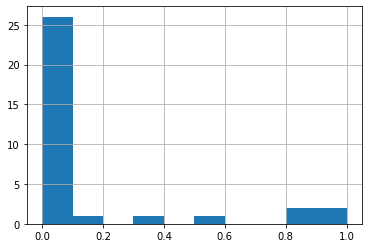

In [13]:
sub.poi.hist()